## 1. Implementing a Basic RNN Model

○ Task: Using a dataset of your choice (e.g., text, time-series data), implement a
basic RNN model. Train the model to perform a sequence task such as text
generation, sentiment analysis, or time-series prediction.
○ Deliverable: Perform this experimentation in a notebook and provide a detailed
explanation or comments.

In [1]:
## Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.model_selection import train_test_split



In [2]:
## load the dataset

df = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')

# Check the first few rows
df.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Data Preprocessing

In [3]:
# Select the column 'Open' for prediction
data = df['Open'].values.reshape(-1, 1)

In [4]:
# Feature scaling (normalizing the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [5]:
# Create input sequences and corresponding labels
X = []
y = []

# use the past 60 days of stock prices to predict the next day's price
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # 60 previous values
    y.append(scaled_data[i, 0])  # The next value to predict

# Convert lists to numpy arrays
X, y = np.array(X), np.array(y)

In [6]:
# Reshape X to be compatible with RNN input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Build the RNN Model


In [7]:
# Initialize the RNN
model = Sequential()

# Add the first SimpleRNN layer with 50 units and Dropout to prevent overfitting
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add a second SimpleRNN layer
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the Model


In [8]:
# Train the model for 20 epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1481 - val_loss: 0.0016
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0308 - val_loss: 0.0020
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0163 - val_loss: 0.0046
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - val_loss: 8.1043e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - val_loss: 0.0023
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0093 - val_loss: 0.0018
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0068 - val_loss: 8.8651e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0053 - val_loss: 7.4228e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0051 - val_loss: 5.9472e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0054 - val_loss: 7.5653e-04
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2

### Evaluate the Model

In [9]:
# Make predictions on the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform the predicted values to get the actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))




8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


### Visualize the Results

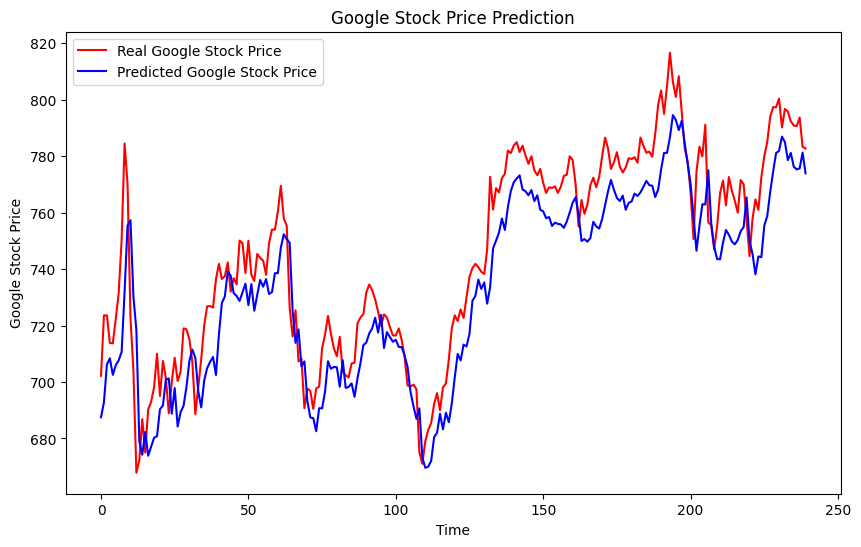

In [10]:
# Plot the real vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## 2. Stacking RNN Layers and Bi-directional RNNs

○ Task: Modify your basic RNN model by stacking multiple RNN layers and also
converting it into a bi-directional RNN. Analyze the performance improvement (if
any) compared to the basic RNN model. (Note: Separate Implementation of
Stacked RNN &amp; Bi-Directional RNN)
○ Deliverable: Perform this experimentation in a notebook and provide a detailed
explanation or comments.

In [11]:
# Define the stacked RNN model
stacked_rnn_model = Sequential()

# Add the first RNN layer with 50 units and return_sequences=True to stack another RNN layer
stacked_rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
stacked_rnn_model.add(Dropout(0.2))

# Add a second RNN layer with 50 units
stacked_rnn_model.add(SimpleRNN(units=50, return_sequences=True))
stacked_rnn_model.add(Dropout(0.2))

# Add a third RNN layer with 50 units
stacked_rnn_model.add(SimpleRNN(units=50))
stacked_rnn_model.add(Dropout(0.2))

# Add the output layer
stacked_rnn_model.add(Dense(units=1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
stacked_rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the stacked RNN model
stacked_rnn_history = stacked_rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.3238 - val_loss: 0.0121
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1389 - val_loss: 0.0185
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1072 - val_loss: 0.0048
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0593 - val_loss: 0.0018
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0474 - val_loss: 0.0014
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0389 - val_loss: 0.0013
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0315 - val_loss: 0.0022
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0259 - val_loss: 0.0013
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0220 - val_loss: 0.0011
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0181 - val_loss: 0.0020
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0172 - val_loss: 0.0020
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0

In [14]:
# Evaluate the stacked RNN model
stacked_rnn_predictions = stacked_rnn_model.predict(X_test)
stacked_rnn_predictions = scaler.inverse_transform(stacked_rnn_predictions.reshape(-1, 1))
stacked_rnn_real = scaler.inverse_transform(y_test.reshape(-1, 1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


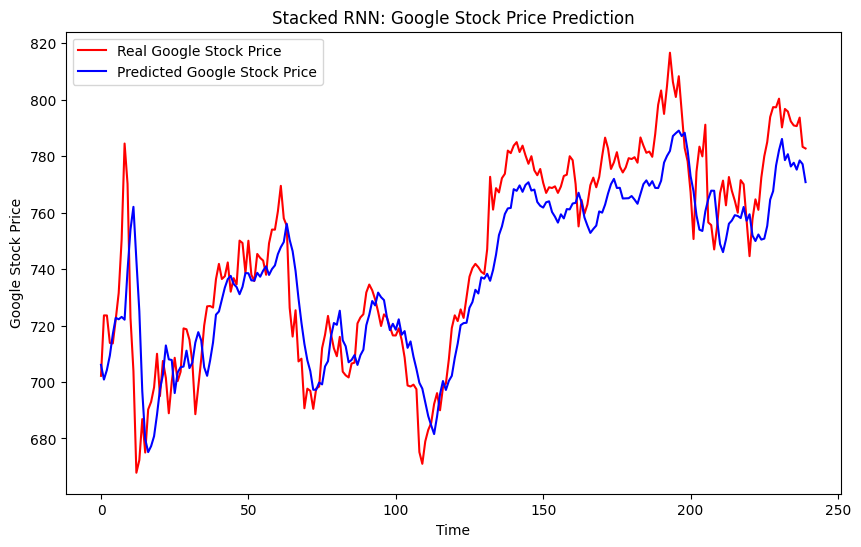

In [15]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stacked_rnn_real, color='red', label='Real Google Stock Price')
plt.plot(stacked_rnn_predictions, color='blue', label='Predicted Google Stock Price')
plt.title('Stacked RNN: Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [16]:
# Calculate MSE
stacked_rnn_mse = mean_squared_error(stacked_rnn_real, stacked_rnn_predictions)
print(f'Stacked RNN Mean Squared Error: {stacked_rnn_mse}')

Stacked RNN Mean Squared Error: 271.7844225411321


## 3. Exploring Hybrid Architectures

○ Task: Implement a hybrid architecture by combining your RNN model with
another model (e.g., CNN, Attention mechanism). Train this hybrid model on the
same dataset and compare its performance with the previous models.

○ Deliverable: Submit the Python code in a notebook for the hybrid model along
with a report discussing the results, challenges faced, and the benefits (or
drawbacks) of using a hybrid approach.

In [17]:
## As data is already preprocessed or and splitted 

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)


In [18]:
# Define the CNN-RNN model
cnn_rnn_model = Sequential()

In [19]:
from keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout, Flatten

# Define timesteps and features for input data
timesteps = X_train.shape[1]  # number of timesteps (e.g., 60)
features = 1  # number of features for stock prices

# Create the CNN-RNN hybrid model
cnn_rnn_model = Sequential()

# Add a Conv1D layer
cnn_rnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))

# Add a MaxPooling1D layer
cnn_rnn_model.add(MaxPooling1D(pool_size=2))

# Add a SimpleRNN layer
cnn_rnn_model.add(SimpleRNN(units=50, return_sequences=True))
cnn_rnn_model.add(Dropout(0.2))

# Add a Dense layer for the output
cnn_rnn_model.add(Dense(1))  # For regression output (stock price)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
cnn_rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the model
cnn_rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1603 - val_loss: 0.1328
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0582 - val_loss: 0.2276
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0567 - val_loss: 0.1804
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0529 - val_loss: 0.2329
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0497 - val_loss: 0.1644
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0493 - val_loss: 0.1565
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0516 - val_loss: 0.1993
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0488 - val_loss: 0.2234
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0523 - val_loss: 0.1980
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0507 - val_loss: 0.2236
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0503 - val_loss: 0.2191
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

In [22]:
# Evaluate the CNN-RNN model
cnn_rnn_predictions = cnn_rnn_model.predict(X_test_scaled)
cnn_rnn_predictions = scaler.inverse_transform(cnn_rnn_predictions.reshape(-1, 1))
cnn_rnn_real = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


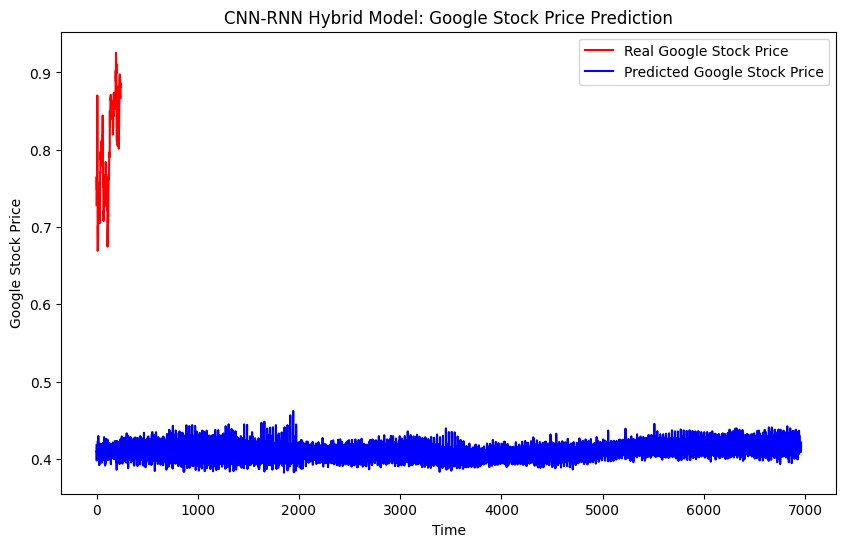

In [23]:
# Plot the results

plt.figure(figsize=(10,6))
plt.plot(cnn_rnn_real, color='red', label='Real Google Stock Price')
plt.plot(cnn_rnn_predictions, color='blue', label='Predicted Google Stock Price')
plt.title('CNN-RNN Hybrid Model: Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()